Ethiopian sign language to Amharic Text Translation using LSTM (long short term memory) neural network.

### 1. import and install dependencies

In [121]:
# pip --version

In [8]:
# !pip list

In [9]:
# pip show tensorflow

In [13]:
# pip show mediapipe

In [1]:
import tensorflow as tf

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


### 2. keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
from PIL import ImageFont, ImageDraw, Image

In [7]:
cap = cv2.VideoCapture(0)

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)


#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        #make detaction
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image,results)
             
      # Draw Amharic text on the frame
    
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        draw.text((10, 20), 'ሰላም እንዲት ናችሁ?',font=font, fill=font_color)
        image = np.array(img_pil)

        
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
       
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
cap.release()
cv2.destroyAllWindows()

In [9]:
len(results.left_hand_landmarks.landmark)

21

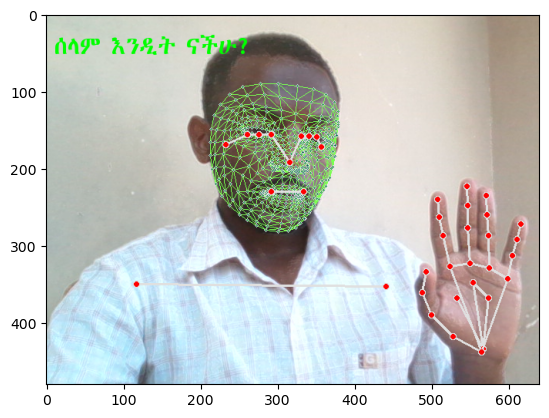

In [10]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

### 3. Extract key point values

In [11]:
len(results.pose_landmarks.landmark)

33

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
len(pose)

33

In [14]:
pose[0]

array([ 0.49486691,  0.40140599, -0.90911198,  0.99998897])

In [15]:
len(results.face_landmarks.landmark)*3

1404

In [16]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x,res.y,res.z])
    face.append(test)

In [17]:
len(face)

468

In [19]:
results.pose_landmarks.landmark

[x: 0.5220425
y: 0.6296203
z: -1.03719
visibility: 0.9999122
, x: 0.5448826
y: 0.57162154
z: -0.9430525
visibility: 0.999857
, x: 0.55819273
y: 0.5735361
z: -0.9432246
visibility: 0.99989486
, x: 0.5717226
y: 0.57620835
z: -0.94268405
visibility: 0.99986523
, x: 0.4952956
y: 0.56991297
z: -0.96869504
visibility: 0.999825
, x: 0.47776
y: 0.57057554
z: -0.9678825
visibility: 0.9998204
, x: 0.46119016
y: 0.5724381
z: -0.96837014
visibility: 0.99974835
, x: 0.59307826
y: 0.61258215
z: -0.474183
visibility: 0.9998876
, x: 0.43253884
y: 0.6095028
z: -0.58119154
visibility: 0.9998802
, x: 0.55384266
y: 0.6964779
z: -0.8654083
visibility: 0.9998546
, x: 0.49090356
y: 0.6910315
z: -0.9000012
visibility: 0.9998823
, x: 0.71559477
y: 0.94496566
z: -0.22390258
visibility: 0.99818003
, x: 0.26411587
y: 0.94850576
z: -0.306583
visibility: 0.991274
, x: 0.8670999
y: 1.3870356
z: -0.8008978
visibility: 0.6732416
, x: 0.1508894
y: 1.4321955
z: -0.2677669
visibility: 0.12636058
, x: 0.7620262
y: 0.96634

In [43]:
results.face_landmarks.landmark

[x: 0.49879968
y: 0.5807034
z: -0.035114218
, x: 0.5031048
y: 0.53626996
z: -0.051452715
, x: 0.50045365
y: 0.5537325
z: -0.032074604
, x: 0.4945572
y: 0.5003021
z: -0.033181757
, x: 0.50386953
y: 0.5235704
z: -0.052734055
, x: 0.50389767
y: 0.5096405
z: -0.04636595
, x: 0.50324565
y: 0.47865626
z: -0.013430253
, x: 0.4263675
y: 0.47798765
z: 0.016723564
, x: 0.5040498
y: 0.4475484
z: -0.0003940268
, x: 0.5048297
y: 0.43015957
z: 0.0017542811
, x: 0.50728977
y: 0.3792649
z: 0.022696598
, x: 0.49839136
y: 0.58648634
z: -0.0343557
, x: 0.49779916
y: 0.59163696
z: -0.03230737
, x: 0.49727696
y: 0.59413916
z: -0.029124167
, x: 0.49568084
y: 0.61133206
z: -0.027001351
, x: 0.49560112
y: 0.61567324
z: -0.029461008
, x: 0.4952503
y: 0.6217455
z: -0.033180706
, x: 0.49463448
y: 0.62915176
z: -0.03404495
, x: 0.49337927
y: 0.6435493
z: -0.030250825
, x: 0.5020032
y: 0.54432094
z: -0.047727685
, x: 0.49081796
y: 0.54496264
z: -0.03653962
, x: 0.39366353
y: 0.43400183
z: 0.06736586
, x: 0.4557878

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility]
                for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(21*3)

In [19]:
face = np.array([[res.x, res.y, res.z]
                for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [20]:
lh = np.array([[res.x, res.y, res.z]
                for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
                

In [47]:
lh

array([ 8.95305455e-01,  8.65858018e-01,  4.06333641e-07,  8.28801215e-01,
        8.31700385e-01, -1.65742710e-02,  7.80015051e-01,  7.72291124e-01,
       -2.36484781e-02,  7.59874165e-01,  7.09666073e-01, -3.02623641e-02,
        7.54220486e-01,  6.57796443e-01, -3.55185755e-02,  8.15334439e-01,
        6.72787845e-01, -4.83027566e-03,  7.97859490e-01,  5.92692614e-01,
       -1.92899145e-02,  7.91425407e-01,  5.42660773e-01, -3.23093943e-02,
        7.88916469e-01,  5.00540316e-01, -4.15452309e-02,  8.54068696e-01,
        6.58373296e-01, -8.48442037e-03,  8.45939279e-01,  5.68856657e-01,
       -1.83518436e-02,  8.42519283e-01,  5.12077808e-01, -2.94716917e-02,
        8.41958821e-01,  4.65890527e-01, -3.78071703e-02,  8.92282605e-01,
        6.62590265e-01, -1.58110540e-02,  8.88504267e-01,  5.77322841e-01,
       -2.84456965e-02,  8.85812640e-01,  5.25031567e-01, -3.82094681e-02,
        8.84094298e-01,  4.83280838e-01, -4.51468416e-02,  9.31543827e-01,
        6.81600153e-01, -

In [21]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
rh = np.array([[res.x, res.y, res.z]
                for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [25]:
 extract_keypoints(results)[:-10]

array([ 0.49486691,  0.40140599, -0.90911198, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
468*3+33*4+21*3+21*3

1662

### 4. Setup Folders for Collection

In [ ]:
# Data_PATH = "C:/Users/Elias/Desktop/Project-Feb to/ESLT-1/MP_DATA"

In [27]:
# DATA_PATH = os.path.join('Health_Data1') # path for exported numpy array
# actions = np.array(['ሆስፒታል','ሃኪም','ሀኪም','ምርመራ','ትኩሳት']) #action try to detact

actions = np.array(['የ ምልክት ቆንቆ','ታውቃለህ','ትችላለህ','ሰላም','አደርክ','ዋልክ','አመሸህ']) #action try to detact

no_sequences = 10 # Thirty videos of worth data
sequence_length = 10 # videos are going to be 10 frame in length

In [28]:
actions[2]

'ትችላለህ'

In [105]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Collect Keypoints Values for Training and Testing

In [107]:
cap = cv2.VideoCapture(0)

#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
   
   # Loop through actions
    for action in actions:
        # Loop through sequences in videos
        for sequence in range(no_sequences):
            # Loop through video length data sequence length
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
                
                #make detaction 
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # draw landmarks
                draw_styled_landmarks(image,results)
                
                #Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        
                    # show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully  
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [294]:
cap.release()
cv2.destroyAllWindows()

### 6. Preprocess Data and Create Labels and Features

In [29]:
import tensorflow as tf

In [30]:
# tf.__version__

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'የ ምልክት ቆንቆ': 0,
 'ታውቃለህ': 1,
 'ትችላለህ': 2,
 'ሰላም': 3,
 'አደርክ': 4,
 'ዋልክ': 5,
 'አመሸህ': 6}

In [113]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [114]:
np.array(labels).shape

(50,)

In [115]:
np.array(sequences).shape

(50, 10, 1662)

In [116]:
np.array(window).shape

(10, 1662)

In [117]:
# converts the Python list sequences into a NumPy array named x
x = np.array(sequences) 

In [118]:
x.shape

(50, 10, 1662)

In [95]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [119]:
y = to_categorical(labels).astype(int)

In [109]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [121]:
x_test.shape

(3, 10, 1662)

In [122]:
x_train.shape

(47, 10, 1662)

In [123]:
y_test.shape

(3, 5)

In [124]:
y_train.shape

(47, 5)

### 7. Build and Train LSTM Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
actions.shape[0]

7

In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [38]:
actions.shape[0]

7

In [130]:
x.shape

(50, 10, 1662)

In [131]:
res = [0.1,0.3,0.5,0.9,0.3]

In [132]:
np.argmax(res)

3

In [133]:
actions[np.argmax(res)]

'ምርመራ'

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [135]:
# # train a neural network model with input data x_train and corresponding labels y_train for 2000 epochs

model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback]) 

Epoch 1/2000
2/2 [==============================] - 14s 30ms/step - loss: 1.6063 - categorical_accuracy: 0.2553
Epoch 2/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.6139 - categorical_accuracy: 0.1702
Epoch 3/2000
2/2 [==============================] - 0s 33ms/step - loss: 1.5864 - categorical_accuracy: 0.1915
Epoch 4/2000
2/2 [==============================] - 0s 46ms/step - loss: 1.5725 - categorical_accuracy: 0.2553
Epoch 5/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.4646 - categorical_accuracy: 0.2553
Epoch 6/2000
2/2 [==============================] - 0s 24ms/step - loss: 1.3075 - categorical_accuracy: 0.4043
Epoch 7/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.5520 - categorical_accuracy: 0.2553
Epoch 8/2000
2/2 [==============================] - 0s 28ms/step - loss: 1.5042 - categorical_accuracy: 0.3617
Epoch 9/2000
2/2 [==============================] - 0s 44ms/step - loss: 1.2308 - categorical_accuracy: 0.3617


2/2 [==============================] - 0s 36ms/step - loss: 0.1295 - categorical_accuracy: 0.9787
Epoch 147/2000
2/2 [==============================] - 0s 30ms/step - loss: 0.1247 - categorical_accuracy: 0.9149
Epoch 148/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.1894 - categorical_accuracy: 0.9149
Epoch 149/2000
2/2 [==============================] - 0s 31ms/step - loss: 0.6723 - categorical_accuracy: 0.7021
Epoch 150/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.8547 - categorical_accuracy: 0.7872
Epoch 151/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.3606 - categorical_accuracy: 0.8298
Epoch 152/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.4233 - categorical_accuracy: 0.7660
Epoch 153/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.4792 - categorical_accuracy: 0.7234
Epoch 154/2000
2/2 [==============================] - 0s 30ms/step - loss: 0.6266 - categorical_accuracy: 0.829

2/2 [==============================] - 0s 32ms/step - loss: 3.8063e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
2/2 [==============================] - 0s 38ms/step - loss: 3.7571e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
2/2 [==============================] - 0s 32ms/step - loss: 3.7185e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
2/2 [==============================] - 0s 31ms/step - loss: 3.7023e-05 - categorical_accuracy: 1.0000
Epoch 291/2000
2/2 [==============================] - 0s 27ms/step - loss: 3.6665e-05 - categorical_accuracy: 1.0000
Epoch 292/2000
2/2 [==============================] - 0s 29ms/step - loss: 3.6424e-05 - categorical_accuracy: 1.0000
Epoch 293/2000
2/2 [==============================] - 0s 31ms/step - loss: 3.6112e-05 - categorical_accuracy: 1.0000
Epoch 294/2000
2/2 [==============================] - 0s 48ms/step - loss: 3.5732e-05 - categorical_accuracy: 1.0000
Epoch 295/2000
2/2 [==============================] - 0s 28ms/step - loss: 3.54

2/2 [==============================] - 0s 32ms/step - loss: 1.4125e-05 - categorical_accuracy: 1.0000
Epoch 428/2000
2/2 [==============================] - 0s 21ms/step - loss: 1.4046e-05 - categorical_accuracy: 1.0000
Epoch 429/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.4005e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
2/2 [==============================] - 0s 48ms/step - loss: 1.3967e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
2/2 [==============================] - 0s 48ms/step - loss: 1.3955e-05 - categorical_accuracy: 1.0000
Epoch 432/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.3889e-05 - categorical_accuracy: 1.0000
Epoch 433/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.3848e-05 - categorical_accuracy: 1.0000
Epoch 434/2000
2/2 [==============================] - 0s 48ms/step - loss: 1.3803e-05 - categorical_accuracy: 1.0000
Epoch 435/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.36

2/2 [==============================] - 0s 32ms/step - loss: 7.2742e-06 - categorical_accuracy: 1.0000
Epoch 568/2000
2/2 [==============================] - 0s 32ms/step - loss: 7.2437e-06 - categorical_accuracy: 1.0000
Epoch 569/2000
2/2 [==============================] - 0s 32ms/step - loss: 7.1981e-06 - categorical_accuracy: 1.0000
Epoch 570/2000
2/2 [==============================] - 0s 39ms/step - loss: 7.1854e-06 - categorical_accuracy: 1.0000
Epoch 571/2000
2/2 [==============================] - 0s 42ms/step - loss: 7.1322e-06 - categorical_accuracy: 1.0000
Epoch 572/2000
2/2 [==============================] - 0s 31ms/step - loss: 7.1017e-06 - categorical_accuracy: 1.0000
Epoch 573/2000
2/2 [==============================] - 0s 25ms/step - loss: 7.0764e-06 - categorical_accuracy: 1.0000
Epoch 574/2000
2/2 [==============================] - 0s 32ms/step - loss: 7.0358e-06 - categorical_accuracy: 1.0000
Epoch 575/2000
2/2 [==============================] - 0s 38ms/step - loss: 7.01

2/2 [==============================] - 0s 47ms/step - loss: 4.3473e-06 - categorical_accuracy: 1.0000
Epoch 708/2000
2/2 [==============================] - 0s 41ms/step - loss: 4.3219e-06 - categorical_accuracy: 1.0000
Epoch 709/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.3092e-06 - categorical_accuracy: 1.0000
Epoch 710/2000
2/2 [==============================] - 0s 32ms/step - loss: 4.3042e-06 - categorical_accuracy: 1.0000
Epoch 711/2000
2/2 [==============================] - 0s 32ms/step - loss: 4.2915e-06 - categorical_accuracy: 1.0000
Epoch 712/2000
2/2 [==============================] - 0s 51ms/step - loss: 4.2763e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
2/2 [==============================] - 0s 48ms/step - loss: 4.2611e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
2/2 [==============================] - 0s 49ms/step - loss: 4.2560e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
2/2 [==============================] - 0s 31ms/step - loss: 4.24

2/2 [==============================] - 0s 31ms/step - loss: 2.8306e-06 - categorical_accuracy: 1.0000
Epoch 848/2000
2/2 [==============================] - 0s 31ms/step - loss: 2.8255e-06 - categorical_accuracy: 1.0000
Epoch 849/2000
2/2 [==============================] - 0s 33ms/step - loss: 2.8230e-06 - categorical_accuracy: 1.0000
Epoch 850/2000
2/2 [==============================] - 0s 32ms/step - loss: 2.8179e-06 - categorical_accuracy: 1.0000
Epoch 851/2000
2/2 [==============================] - 0s 32ms/step - loss: 2.8077e-06 - categorical_accuracy: 1.0000
Epoch 852/2000
2/2 [==============================] - 0s 26ms/step - loss: 2.8001e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
2/2 [==============================] - 0s 31ms/step - loss: 2.7900e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
2/2 [==============================] - 0s 32ms/step - loss: 2.7773e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
2/2 [==============================] - 0s 32ms/step - loss: 2.77

2/2 [==============================] - 0s 32ms/step - loss: 1.9657e-06 - categorical_accuracy: 1.0000
Epoch 988/2000
2/2 [==============================] - 0s 47ms/step - loss: 1.9631e-06 - categorical_accuracy: 1.0000
Epoch 989/2000
2/2 [==============================] - 0s 48ms/step - loss: 1.9555e-06 - categorical_accuracy: 1.0000
Epoch 990/2000
2/2 [==============================] - 0s 36ms/step - loss: 1.9479e-06 - categorical_accuracy: 1.0000
Epoch 991/2000
2/2 [==============================] - 0s 31ms/step - loss: 1.9454e-06 - categorical_accuracy: 1.0000
Epoch 992/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.9403e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.9352e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.9327e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
2/2 [==============================] - 0s 33ms/step - loss: 1.92

2/2 [==============================] - 0s 32ms/step - loss: 1.4305e-06 - categorical_accuracy: 1.0000
Epoch 1126/2000
2/2 [==============================] - 0s 34ms/step - loss: 1.4305e-06 - categorical_accuracy: 1.0000
Epoch 1127/2000
2/2 [==============================] - 0s 38ms/step - loss: 1.4254e-06 - categorical_accuracy: 1.0000
Epoch 1128/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.4204e-06 - categorical_accuracy: 1.0000
Epoch 1129/2000
2/2 [==============================] - 0s 31ms/step - loss: 1.4178e-06 - categorical_accuracy: 1.0000
Epoch 1130/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.4178e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.4102e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
2/2 [==============================] - 0s 47ms/step - loss: 1.4102e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
2/2 [==============================] - 0s 31ms/step - lo

2/2 [==============================] - 0s 39ms/step - loss: 1.0577e-06 - categorical_accuracy: 1.0000
Epoch 1264/2000
2/2 [==============================] - 0s 48ms/step - loss: 1.0551e-06 - categorical_accuracy: 1.0000
Epoch 1265/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.0526e-06 - categorical_accuracy: 1.0000
Epoch 1266/2000
2/2 [==============================] - 0s 39ms/step - loss: 1.0501e-06 - categorical_accuracy: 1.0000
Epoch 1267/2000
2/2 [==============================] - 0s 32ms/step - loss: 1.0475e-06 - categorical_accuracy: 1.0000
Epoch 1268/2000
2/2 [==============================] - 0s 38ms/step - loss: 1.0450e-06 - categorical_accuracy: 1.0000
Epoch 1269/2000
2/2 [==============================] - 0s 48ms/step - loss: 1.0424e-06 - categorical_accuracy: 1.0000
Epoch 1270/2000
2/2 [==============================] - 0s 47ms/step - loss: 1.0424e-06 - categorical_accuracy: 1.0000
Epoch 1271/2000
2/2 [==============================] - 0s 47ms/step - lo

2/2 [==============================] - 0s 31ms/step - loss: 8.0403e-07 - categorical_accuracy: 1.0000
Epoch 1402/2000
2/2 [==============================] - 0s 32ms/step - loss: 8.0403e-07 - categorical_accuracy: 1.0000
Epoch 1403/2000
2/2 [==============================] - 0s 32ms/step - loss: 8.0403e-07 - categorical_accuracy: 1.0000
Epoch 1404/2000
2/2 [==============================] - 0s 51ms/step - loss: 7.9895e-07 - categorical_accuracy: 1.0000
Epoch 1405/2000
2/2 [==============================] - 0s 48ms/step - loss: 7.9388e-07 - categorical_accuracy: 1.0000
Epoch 1406/2000
2/2 [==============================] - 0s 32ms/step - loss: 7.9388e-07 - categorical_accuracy: 1.0000
Epoch 1407/2000
2/2 [==============================] - 0s 32ms/step - loss: 7.9135e-07 - categorical_accuracy: 1.0000
Epoch 1408/2000
2/2 [==============================] - 0s 33ms/step - loss: 7.9135e-07 - categorical_accuracy: 1.0000
Epoch 1409/2000
2/2 [==============================] - 0s 48ms/step - lo

2/2 [==============================] - 0s 32ms/step - loss: 6.1634e-07 - categorical_accuracy: 1.0000
Epoch 1540/2000
2/2 [==============================] - 0s 55ms/step - loss: 6.1634e-07 - categorical_accuracy: 1.0000
Epoch 1541/2000
2/2 [==============================] - 0s 46ms/step - loss: 6.0619e-07 - categorical_accuracy: 1.0000
Epoch 1542/2000
2/2 [==============================] - 0s 48ms/step - loss: 6.0873e-07 - categorical_accuracy: 1.0000
Epoch 1543/2000
2/2 [==============================] - 0s 32ms/step - loss: 6.0873e-07 - categorical_accuracy: 1.0000
Epoch 1544/2000
2/2 [==============================] - 0s 38ms/step - loss: 6.0365e-07 - categorical_accuracy: 1.0000
Epoch 1545/2000
2/2 [==============================] - 0s 32ms/step - loss: 6.0365e-07 - categorical_accuracy: 1.0000
Epoch 1546/2000
2/2 [==============================] - 0s 37ms/step - loss: 6.0365e-07 - categorical_accuracy: 1.0000
Epoch 1547/2000
2/2 [==============================] - 0s 48ms/step - lo

2/2 [==============================] - 0s 48ms/step - loss: 4.7430e-07 - categorical_accuracy: 1.0000
Epoch 1678/2000
2/2 [==============================] - 0s 28ms/step - loss: 4.7176e-07 - categorical_accuracy: 1.0000
Epoch 1679/2000
2/2 [==============================] - 0s 32ms/step - loss: 4.7176e-07 - categorical_accuracy: 1.0000
Epoch 1680/2000
2/2 [==============================] - 0s 36ms/step - loss: 4.6923e-07 - categorical_accuracy: 1.0000
Epoch 1681/2000
2/2 [==============================] - 0s 32ms/step - loss: 4.6669e-07 - categorical_accuracy: 1.0000
Epoch 1682/2000
2/2 [==============================] - 0s 35ms/step - loss: 4.6669e-07 - categorical_accuracy: 1.0000
Epoch 1683/2000
2/2 [==============================] - 0s 32ms/step - loss: 4.6669e-07 - categorical_accuracy: 1.0000
Epoch 1684/2000
2/2 [==============================] - 0s 39ms/step - loss: 4.6669e-07 - categorical_accuracy: 1.0000
Epoch 1685/2000
2/2 [==============================] - 0s 32ms/step - lo

2/2 [==============================] - 0s 34ms/step - loss: 3.6016e-07 - categorical_accuracy: 1.0000
Epoch 1816/2000
2/2 [==============================] - 0s 33ms/step - loss: 3.6016e-07 - categorical_accuracy: 1.0000
Epoch 1817/2000
2/2 [==============================] - 0s 33ms/step - loss: 3.6016e-07 - categorical_accuracy: 1.0000
Epoch 1818/2000
2/2 [==============================] - 0s 34ms/step - loss: 3.6016e-07 - categorical_accuracy: 1.0000
Epoch 1819/2000
2/2 [==============================] - 0s 35ms/step - loss: 3.6016e-07 - categorical_accuracy: 1.0000
Epoch 1820/2000
2/2 [==============================] - 0s 34ms/step - loss: 3.6016e-07 - categorical_accuracy: 1.0000
Epoch 1821/2000
2/2 [==============================] - 0s 33ms/step - loss: 3.6016e-07 - categorical_accuracy: 1.0000
Epoch 1822/2000
2/2 [==============================] - 0s 33ms/step - loss: 3.6016e-07 - categorical_accuracy: 1.0000
Epoch 1823/2000
2/2 [==============================] - 0s 36ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 2.9422e-07 - categorical_accuracy: 1.0000
Epoch 1954/2000
2/2 [==============================] - 0s 48ms/step - loss: 2.9422e-07 - categorical_accuracy: 1.0000
Epoch 1955/2000
2/2 [==============================] - 0s 48ms/step - loss: 2.9422e-07 - categorical_accuracy: 1.0000
Epoch 1956/2000
2/2 [==============================] - 0s 47ms/step - loss: 2.8915e-07 - categorical_accuracy: 1.0000
Epoch 1957/2000
2/2 [==============================] - 0s 33ms/step - loss: 2.8915e-07 - categorical_accuracy: 1.0000
Epoch 1958/2000
2/2 [==============================] - 0s 29ms/step - loss: 2.8915e-07 - categorical_accuracy: 1.0000
Epoch 1959/2000
2/2 [==============================] - 0s 31ms/step - loss: 2.8661e-07 - categorical_accuracy: 1.0000
Epoch 1960/2000
2/2 [==============================] - 0s 31ms/step - loss: 2.8661e-07 - categorical_accuracy: 1.0000
Epoch 1961/2000
2/2 [==============================] - 0s 32ms/step - lo

In [136]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 10, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 596741 (2.28 MB)
Trainable params: 59674

### 8. Make Predictions

In [137]:
model.predict(x_test)

1/1 [==============================] - 1s 1s/step


array([[1.7066700e-11, 5.9209208e-15, 1.0000000e+00, 1.9037118e-17,
        3.2917322e-15],
       [1.8230147e-13, 9.9780887e-01, 1.2650895e-05, 2.1784992e-03,
        1.6413039e-15],
       [1.2087644e-13, 5.2013337e-07, 9.9999952e-01, 5.0806695e-13,
        9.4666003e-19]], dtype=float32)

In [138]:
res = model.predict(x_test)

1/1 [==============================] - 0s 65ms/step


In [139]:
res[0]

array([1.7066700e-11, 5.9209208e-15, 1.0000000e+00, 1.9037118e-17,
       3.2917322e-15], dtype=float32)

In [140]:
actions.shape[0]

5

In [141]:
actions[np.argmax(res[2])]

'ሀኪም'

In [142]:
actions[np.argmax(y_test[2])]

'ሀኪም'

## 9. Save Weights

In [143]:
# model.save('Health1.keras')

In [144]:
# model.save('Health1.h5')

C:\Users\Elias\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
model.load_weights('Greeting5.keras')

### 10. Evaluation using Confusion Matrix and Accuracy

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [55]:
yhat = model.predict(x_train)

NameError: name 'x_train' is not defined

In [61]:
yhat

array([[1.38826950e-08, 4.47683085e-10, 2.31141506e-08, 2.73728297e-11,
        1.00000000e+00],
       [8.15244313e-12, 1.76994954e-20, 9.31557942e-10, 1.00000000e+00,
        4.30241170e-14],
       [1.23148309e-08, 1.17336540e-11, 5.65582692e-09, 2.63285106e-11,
        1.00000000e+00],
       [1.51289217e-10, 1.34697326e-21, 5.02499486e-10, 1.00000000e+00,
        3.22423227e-14],
       [1.09388651e-15, 1.89278953e-12, 1.00000000e+00, 3.53374378e-11,
        1.03735924e-15],
       [8.17082402e-09, 1.38711742e-09, 1.20141664e-07, 4.52144260e-11,
        9.99999881e-01],
       [1.00000000e+00, 5.88754978e-20, 1.34008304e-09, 1.74649877e-08,
        1.09363994e-12],
       [2.82397878e-23, 1.00000000e+00, 7.82022017e-12, 1.29576924e-25,
        7.69799988e-11],
       [3.34314027e-20, 1.00000000e+00, 3.16662927e-08, 6.29661403e-22,
        5.37359046e-10],
       [4.32572311e-10, 2.73249777e-20, 1.58631475e-09, 1.00000000e+00,
        1.44043279e-13],
       [8.06462404e-21, 1.0000

In [148]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [183]:
ytrue

[0,
 0,
 1,
 4,
 1,
 4,
 2,
 3,
 1,
 1,
 1,
 0,
 3,
 3,
 1,
 0,
 4,
 0,
 0,
 4,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 0,
 3,
 0,
 4,
 2,
 3,
 2,
 0,
 2,
 0,
 3,
 0,
 3,
 4,
 1,
 2,
 0,
 4,
 2,
 1,
 0,
 2,
 3,
 0,
 3,
 4,
 0,
 2,
 4,
 4,
 4,
 2,
 2,
 4,
 0,
 4,
 2,
 0,
 1,
 2,
 2,
 2,
 3,
 4,
 4,
 2,
 2,
 1,
 0,
 4,
 2,
 3,
 2,
 3,
 0,
 3,
 1,
 3,
 2,
 1,
 1,
 4,
 1,
 3,
 2,
 4,
 1,
 1,
 0,
 3,
 2,
 1,
 4,
 1,
 3,
 4,
 2,
 1,
 0,
 1,
 1,
 2,
 4,
 2,
 3,
 4,
 2,
 4,
 0,
 2,
 3,
 3,
 4,
 1,
 1,
 4,
 0,
 1,
 3,
 3,
 0,
 0,
 4,
 2,
 3,
 4,
 3,
 0,
 4,
 3,
 3,
 0,
 0,
 0]

In [151]:
yhat

[1,
 2,
 0,
 3,
 0,
 0,
 2,
 3,
 2,
 4,
 2,
 0,
 3,
 4,
 1,
 4,
 3,
 1,
 1,
 4,
 0,
 3,
 3,
 0,
 0,
 2,
 1,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 3,
 4,
 2,
 3,
 2,
 1,
 0,
 4,
 2,
 3,
 0,
 3,
 2,
 0,
 0,
 2,
 4,
 3,
 1,
 1,
 0,
 1,
 1,
 4,
 0,
 1,
 1,
 4,
 0,
 1,
 0,
 1,
 2,
 0,
 3,
 3,
 2,
 4,
 0,
 1,
 1,
 0,
 4,
 0,
 3,
 0,
 1,
 3,
 4,
 0,
 0,
 2,
 4,
 1,
 4,
 2,
 2,
 2,
 3,
 4,
 3,
 3,
 4,
 3,
 2,
 4,
 3,
 4,
 2,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 3,
 0,
 3,
 2,
 1,
 0,
 0,
 2,
 0,
 3,
 4,
 3,
 4,
 1,
 1,
 2,
 3,
 3,
 2,
 4,
 2,
 2,
 2,
 1,
 4,
 1,
 4,
 4,
 1,
 0]

In [428]:
# multilabel_confusion_matrix??

In [149]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[37,  0],
        [ 0, 10]],

       [[38,  0],
        [ 0,  9]],

       [[38,  0],
        [ 0,  9]],

       [[38,  0],
        [ 0,  9]],

       [[37,  0],
        [ 0, 10]]], dtype=int64)

In [150]:
accuracy_score(ytrue, yhat)

1.0

## 11. Testing in real time (usng .h5 model)

In [56]:
from PIL import ImageFont, ImageDraw, Image
from scipy import stats

In [57]:
# colors = [(245,117,16), (117,200,160), (16,117,245),(245,117,16), (117,200,100)]

colors = [(245,117,16), (117,200,160), (16,117,245),(245,117,16), (117,200,100),(145,117,16), (117,100,150)]

# Function to render text with Amharic characters on OpenCV image
def render_text_with_amharic(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        # Display Amharic text using render_text_with_amharic function
        output_frame = render_text_with_amharic(output_frame, actions[num], (0, 50+num*40))
    return output_frame

In [58]:

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)

# Function to render text on OpenCV image
def render_text(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

       # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        

        # Prediction logic
        keypoints = extract_keypoints(results)  # Assuming this function is defined elsewhere
        sequence.append(keypoints)
        sequence = sequence[-10:]

        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

#             # Visualize probabilities
#             image = prob_viz(res, actions, image, colors)  # Assuming this function is defined elsewhere


        # Render sentence on the frame
        image = cv2.rectangle(image, (0, 0), (640, 40), (240, 240, 240), -1)
        image = render_text(image, ' '.join(sentence), (5, 5))

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
ትችላለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
የ ምልክት ቆንቆ
<class 'mediapipe.pyth

1/1 [==============================] - 0s 25ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 8ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ታውቃለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
ታውቃለህ
<class 'mediapipe.pytho

1/1 [==============================] - 0s 30ms/step
ትችላለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
አደርክ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
ትችላለህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
አደርክ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
አደርክ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
አደርክ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
አደርክ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
አደርክ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
አደርክ
<class 'mediapipe.python.solu

1/1 [==============================] - 0s 28ms/step
አመሸህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
አመሸህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
አመሸህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
አመሸህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
አመሸህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
አመሸህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
አመሸህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
አመሸህ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
አመሸህ
<class 'mediapipe.python.soluti

In [94]:
cap.release()
cv2.destroyAllWindows()

In [95]:
res[np.argmax(res)] > threshold

True

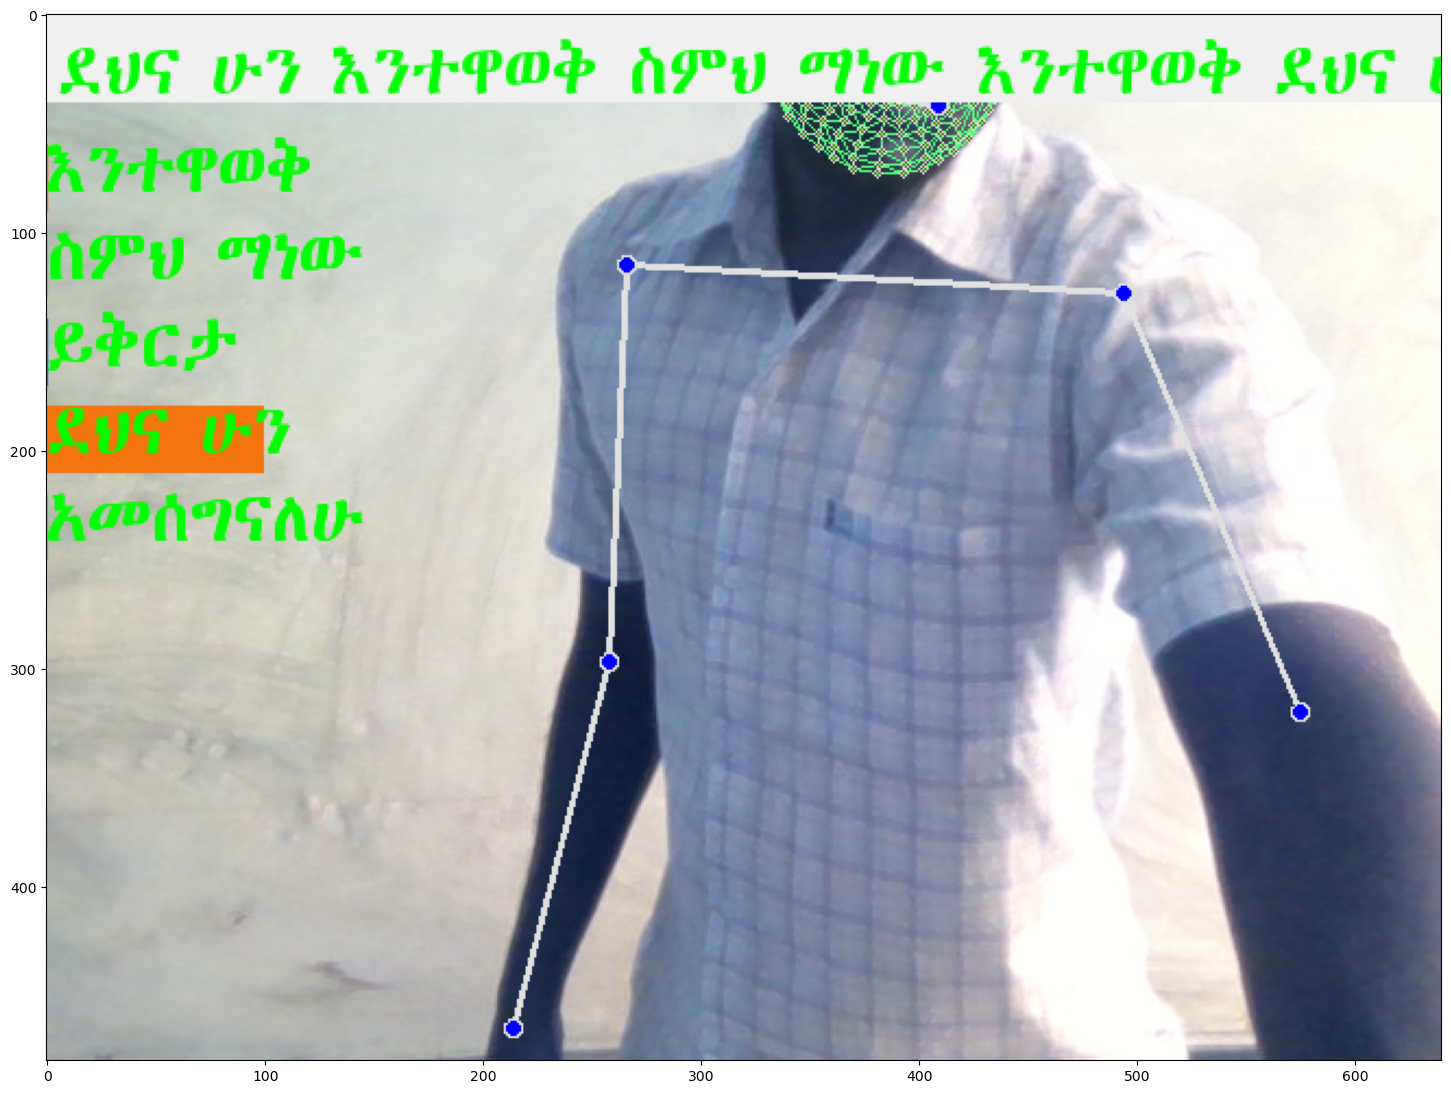

In [96]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [148]:
np.expand_dims(x_test[0], axis=0)

array([[[ 0.55313247,  0.58123988, -1.03259563, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55334145,  0.57986081, -1.0087136 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55338323,  0.57901996, -1.00942826, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.59965652,  0.57502103, -1.26179922, ...,  0.23404279,
          0.5150395 , -0.0121378 ],
        [ 0.59943891,  0.57613385, -1.27742076, ...,  0.23218682,
          0.51297772, -0.01285041],
        [ 0.59921449,  0.57662052, -1.27582788, ...,  0.23205204,
          0.51501346, -0.01659301]]])

In [149]:
model.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 25ms/step


array([[4.6221888e-23, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

tflite model for deployment on mobile and embedded devices

## 12. Testing in Real Time (using .tflite model)

In [103]:
filesize = os.path.getsize('tmodel.tflite')

In [104]:
if filesize > 0:
    print("The model file contains data.")
else:
    print("The model file is empty or does not exist.")

The model file contains data.


In [105]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="tmodel.tflite")
interpreter.allocate_tensors()

In [106]:
# Get details about the model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [109]:
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import cv2

In [110]:
colors = [(245,117,16), (117,200,160), (16,117,245)]

# Function to render text with Amharic characters on OpenCV image
def render_text_with_amharic(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        # Display Amharic text using render_text_with_amharic function
        output_frame = render_text_with_amharic(output_frame, actions[num], (0, 50+num*40))
    return output_frame

In [247]:
# Set up mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Set the font and scale for the text
font_scale = 1
font_color = (0, 255, 0)
thickness = 4

# Set the font path
font_path = 'C:/Abyssinica_SIL/AbyssinicaSIL-Regular.ttf'  # Replace with the correct font file path
font = ImageFont.truetype(font_path, 32)

# Function to render text on OpenCV image
def render_text(image, text, position):
    img_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(img_pil)
    draw.text(position, text, font=font, fill=font_color)
    return np.array(img_pil)

# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read feed
    ret, frame = cap.read()

    # Make detections
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmarks
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp.solutions.drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Prediction logic
    keypoints = extract_keypoints(results)  # Assuming this function is defined elsewhere
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        # Perform inference with TensorFlow Lite model
        input_data = np.expand_dims(sequence, axis=0).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        res = interpreter.get_tensor(output_details[0]['index'])[0]

        predictions.append(np.argmax(res))

        # Sentence formation logic
        if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Visualize probabilities
        image = prob_viz(res, actions, image, colors)  # Assuming this function is defined elsewhere

    # Render sentence on the frame
    image = cv2.rectangle(image, (0, 0), (640, 40), (240, 240, 240), -1)
    image = render_text(image, ' '.join(sentence), (5, 5))

    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'interpreter' is not defined

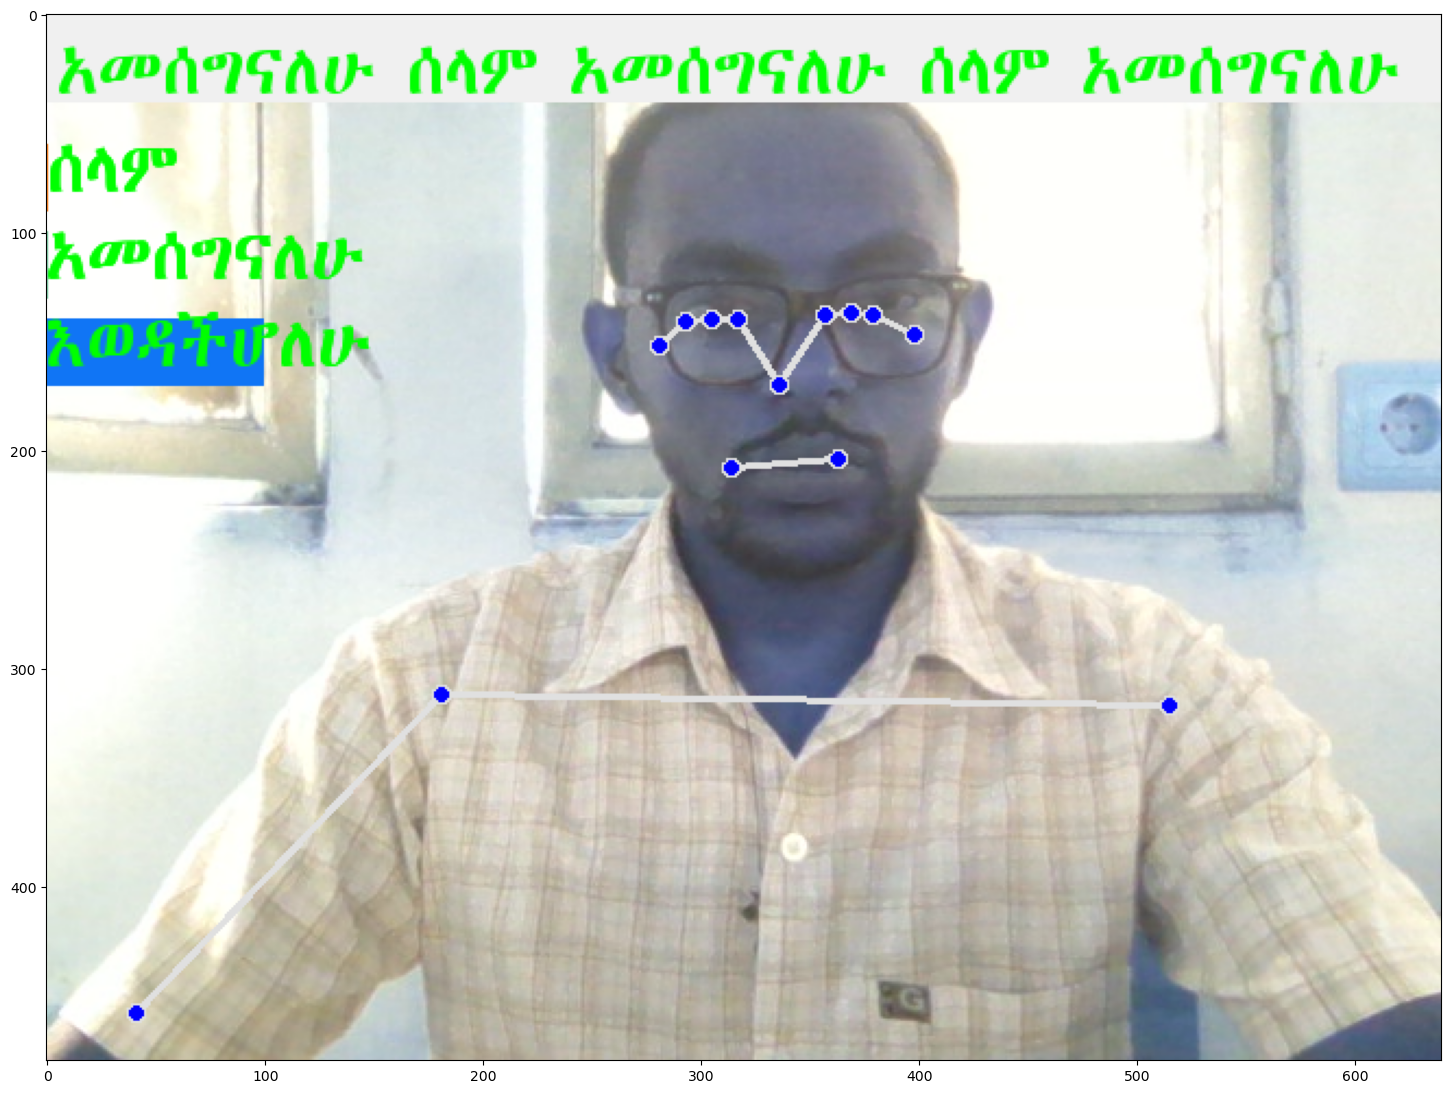

In [116]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [120]:
cap.release()
cv2.destroyAllWindows()


Ethiopian sign language to Amharic text Translation using LSTM (long short term memory) neural network.